In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- ID
- name
- category
- main_category
- currency
- deadline
- goalGoal amount in project currency
- launched
- pledgedPledged amount in the project currency
- state
- backers
- country
- usd pledgedPledged amount in USD (conversion made by KS)
- usd_pledged_realPledged amount in USD (conversion made by fixer.io api)
- usd_goal_realGoal amount in USD

In [2]:
df = pd.read_csv('Downloads/kickstarter-projects/ks-projects-201801.csv')

In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
df.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [6]:
df.groupby(by=['main_category']).count()

,ID,name,category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
main_category,,,,,,,,,,,,,,
Art,28153,28152,28153,28153,28153,28153,28153,28153,28153,28153,28153,28153,28153,28153
Comics,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819
Crafts,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809
Dance,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3767,3768,3768
Design,30070,30069,30070,30070,30070,30070,30070,30070,30070,30070,30070,30067,30070,30070
Fashion,22816,22816,22816,22816,22816,22816,22816,22816,22816,22816,22816,22812,22816,22816
Film & Video,63585,63584,63585,63585,63585,63585,63585,63585,63585,63585,63585,62697,63585,63585
Food,24602,24602,24602,24602,24602,24602,24602,24602,24602,24602,24602,24599,24602,24602
Games,35231,35230,35231,35231,35231,35231,35231,35231,35231,35231,35231,35226,35231,35231


In [7]:
df.groupby(by='state').count()['ID']

state
canceled       38779
failed        197719
live            2799
successful    133956
suspended       1846
undefined       3562
Name: ID, dtype: int64

In [8]:
df.groupby(by='country').count()['ID']

country
AT         597
AU        7839
BE         617
CA       14756
CH         761
DE        4171
DK        1113
ES        2276
FR        2939
GB       33672
HK         618
IE         811
IT        2878
JP          40
LU          62
MX        1752
N,0"      3797
NL        2868
NO         708
NZ        1447
SE        1757
SG         555
US      292627
Name: ID, dtype: int64

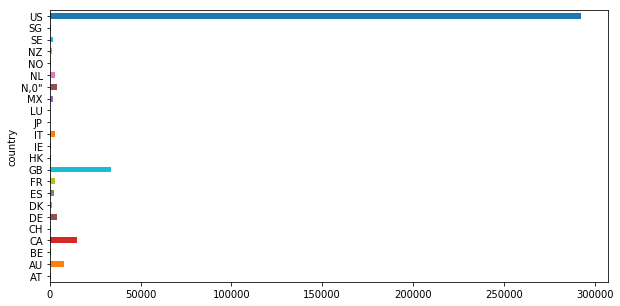

In [9]:
plt.figure(figsize=(10,5))
df.groupby(by='country').count()['ID'].plot(kind='barh')

In [10]:
import numpy as np 

In [12]:
df['usd_goal_real'].describe()

count    3.786610e+05
mean     4.545440e+04
std      1.152950e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.500000e+03
75%      1.550000e+04
max      1.663614e+08
Name: usd_goal_real, dtype: float64

In [13]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 15 columns):
ID                  374860 non-null int64
name                374860 non-null object
category            374860 non-null object
main_category       374860 non-null object
currency            374860 non-null object
deadline            374860 non-null object
goal                374860 non-null float64
launched            374860 non-null object
pledged             374860 non-null float64
state               374860 non-null object
backers             374860 non-null int64
country             374860 non-null object
usd pledged         374860 non-null float64
usd_pledged_real    374860 non-null float64
usd_goal_real       374860 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 45.8+ MB


In [18]:
df['launched']=pd.to_datetime(df.launched)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 15 columns):
ID                  374860 non-null int64
name                374860 non-null object
category            374860 non-null object
main_category       374860 non-null object
currency            374860 non-null object
deadline            374860 non-null object
goal                374860 non-null float64
launched            374860 non-null datetime64[ns]
pledged             374860 non-null float64
state               374860 non-null object
backers             374860 non-null int64
country             374860 non-null object
usd pledged         374860 non-null float64
usd_pledged_real    374860 non-null float64
usd_goal_real       374860 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(7)
memory usage: 45.8+ MB


In [20]:
df.launched.iloc[1].date()

datetime.date(2017, 9, 2)

In [21]:
from datetime import date, datetime


In [22]:
## to get season of the year
bins = [0, 91, 183, 275, 366]
labels=['Winter', 'Spring', 'Summer', 'Fall']
doy = df.launched.dt.dayofyear
df['season'] = pd.cut(doy + 11 - 366*(doy > 355), bins=bins, labels=labels)


In [24]:
#df['season'] = df.launched.apply(lambda x : get_season(x,x.year))

In [25]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,season
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,Summer
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,Summer
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,Winter
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,Winter
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,Summer


In [26]:
#df

In [27]:
df.main_category.unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

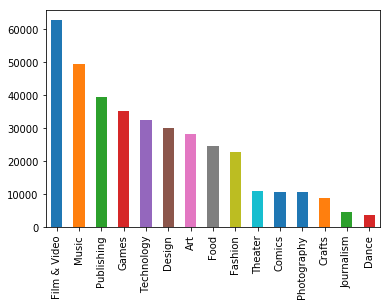

In [28]:
df.main_category.value_counts().plot(kind='bar')

### we can see the most projects in film & video

In [29]:
## since KS conversion doesn't seem very accurate we will drop the usd pledged

In [30]:
df.drop(columns=['usd pledged'],inplace=True)

In [31]:
df.head(30)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,1533.95,Summer
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,2421.00,30000.00,Summer
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,45000.00,Winter
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,5000.00,Winter
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,19500.00,Summer
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,50000.00,Winter
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1000.00,Fall
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,25000.00,Winter
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,125000.00,Spring
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,65000.00,Summer


In [32]:
df['deadline']= pd.to_datetime(df['deadline'])

In [33]:
#df['deadline'].dt.day - df['launched'].dt.day

In [34]:
#df['launched'].dt.

In [35]:
#from bs4 import BeautifulSoup


In [36]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95,Summer
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,Summer
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00,Winter
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00,Winter
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00,Summer


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 15 columns):
ID                  374860 non-null int64
name                374860 non-null object
category            374860 non-null object
main_category       374860 non-null object
currency            374860 non-null object
deadline            374860 non-null datetime64[ns]
goal                374860 non-null float64
launched            374860 non-null datetime64[ns]
pledged             374860 non-null float64
state               374860 non-null object
backers             374860 non-null int64
country             374860 non-null object
usd_pledged_real    374860 non-null float64
usd_goal_real       374860 non-null float64
season              374860 non-null category
dtypes: category(1), datetime64[ns](2), float64(4), int64(2), object(6)
memory usage: 43.3+ MB


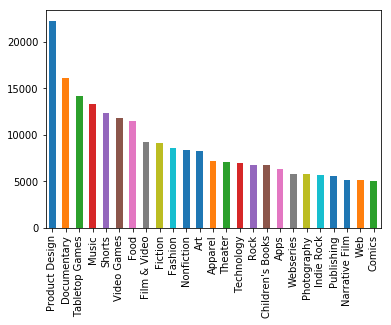

In [38]:
df.category.value_counts()[:25].plot(kind='bar')

## plot only the first 25 sub category 

### let us invistgate more on product design projects

In [39]:
df.query("category == 'Product Design'").state.value_counts()

failed        10718
successful     7961
canceled       3207
live            237
suspended       187
Name: state, dtype: int64

In [40]:
df.query("category == 'Product Design' & state =='successful'").count()[1]/df.query("category == 'Product Design'").count()[1]

0.35683549977588525

## here is the percentage that if project is product design has 35.6% of being successful

In [41]:
df.query("main_category == 'Film & Video'").state.value_counts()

failed        32891
successful    23612
canceled       5744
live            332
suspended       117
Name: state, dtype: int64

In [42]:
df.query("main_category == 'Film & Video' & state =='successful'").count()[1]/df.query("main_category == 'Film & Video'").count()[1]


0.3766109480668623

## here is the percentage that if project is Film & Video has 37.6% of being successful


In [43]:
df.launched.dt.year.value_counts()

2015    74919
2014    66993
2016    56536
2017    52200
2013    44836
2012    41161
2011    26236
2010    10519
2009     1329
2018      124
1970        7
Name: launched, dtype: int64

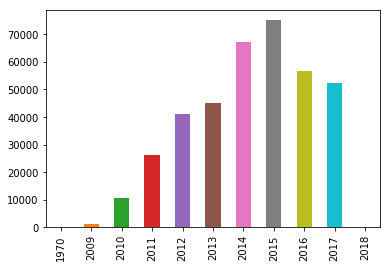

In [44]:
df.launched.dt.year.value_counts().sort_index().plot(kind='bar');

## here we can see that kickstarter have risen with popularity through the years until 2016 we see a decline 

## let see if 2015 have higher successful 

### we have 4 state with project i will consider anything other than successful a failure will drop (live) as they have not done with their projects and will consider canceled as a failure

In [45]:
df.drop(index=df.query("state =='live'").index,inplace=True)

In [46]:
df.query("state =='live'").index

Int64Index([], dtype='int64')

In [48]:
df.state.unique()

array(['failed', 'canceled', 'successful', 'suspended'], dtype=object)

In [49]:
df['state'] = df.state.map({'failed':'failed','canceled':'failed','suspended':'failed','successful':'successful'})

In [50]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95,Summer
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,Summer
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00,Winter
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00,Winter
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,failed,14,US,1283.0,19500.00,Summer


In [51]:
df.state.nunique()

2

In [52]:
df.drop(df.loc[df.launched.dt.year == 1970].index,inplace=True)
df.drop(df.loc[df.launched.dt.year == 2018].index,inplace=True)

### Remove any data that have wrong launch date or 2018 because they are very less and they only contain the first month

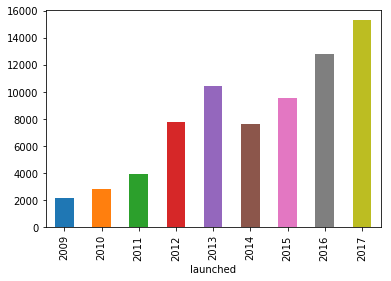

In [53]:
df.groupby(df.launched.dt.year).mean()['pledged'].plot('bar')

## Here we can see that people more people pledge money why is that?
## let us invistigate more on this

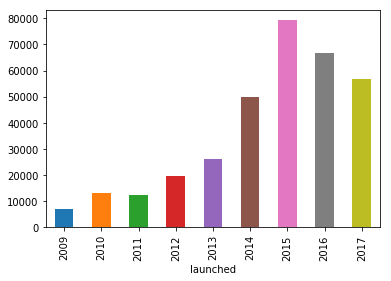

In [54]:
df.groupby(df.launched.dt.year).mean()['goal'].plot('bar');

## we can see that in year 2015 have the highest goal for projects

## 2015 is interesting year for kickstarter  we need to invistigate more in this year to fully understand 
### what i expect in this year that kickstarter have risen in popularity in this year as platform and many creator believed in it as solid platform 

In [55]:
temp = {'successful': 1, 'failed': 0}
df['state'] = df['state'].map(temp)

In [56]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,1533.95,Summer
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,2421.0,30000.00,Summer
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,45000.00,Winter
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,5000.00,Winter
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,19500.00,Summer


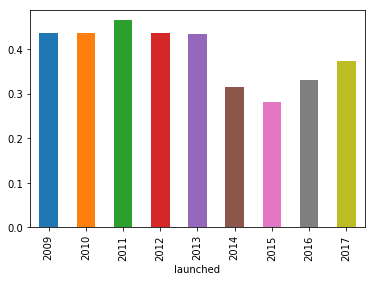

In [57]:
df.groupby(df.launched.dt.year).mean()['state'].plot('bar');

In [58]:
df.groupby('state').mean()

,ID,goal,pledged,backers,usd_pledged_real,usd_goal_real
state,,,,,,
0,1.075041e+09,71320.007810,1698.555087,18.676308,1548.971306,66081.721432
1,1.073765e+09,10166.109761,24094.387965,264.128397,22664.485818,9535.701785


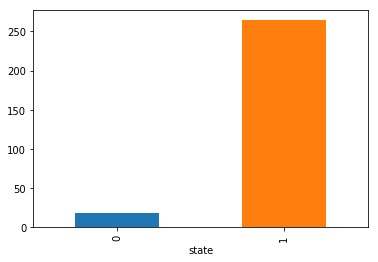

In [60]:
df.groupby('state').mean()['backers'].plot('bar');

## more backers the more projects tend to succeed 

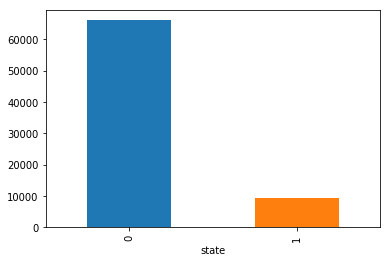

In [109]:
df.groupby('state').mean()['usd_goal_real'].plot('bar')

## as expected when there is a high goal the project tend to fail 

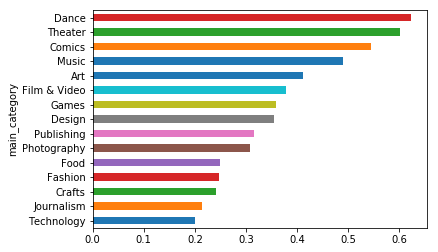

In [61]:
df.groupby('main_category').mean()['state'].sort_values().plot('barh')

## Here we can see the most succesful genre is Dance followed by Theater

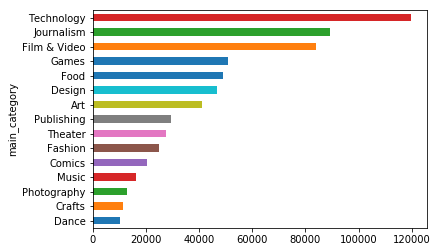

In [62]:
df.groupby('main_category').mean()['goal'].sort_values().plot('barh')

## as we say again a clear sign that if a goal is huge the project tend to fail

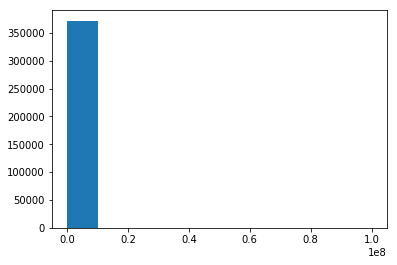

In [64]:
plt.hist(data=df,x='goal');

In [66]:
df['goal'].describe()

count    3.720530e+05
mean     4.931908e+04
std      1.182588e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.500000e+03
75%      1.650000e+04
max      1.000000e+08
Name: goal, dtype: float64

In [71]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,1533.95,Summer
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,2421.0,30000.00,Summer
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,45000.00,Winter
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,5000.00,Winter
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,19500.00,Summer


In [92]:
sorted_goal = sorted(df['usd_goal_real'])


In [93]:
q1, q3= np.percentile(sorted_goal,[25,75])


In [94]:
iqr = q3 - q1

In [95]:
iqr

14000.0

In [96]:
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

In [97]:
lower_bound

-19000.0

In [98]:
upper_bound

37000.0

## here anything above 38250.0 is suspected outliers and some people just put random number i have seen some one asking for 100M for a comic book we will not delete these numbers currently but for sake seeing skeweens we will only see the less than the upper bound

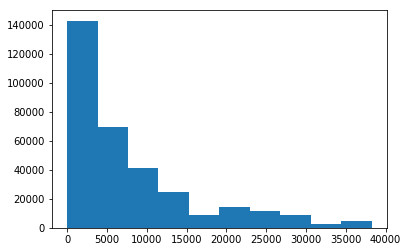

In [106]:

plt.hist(df.loc[df['usd_goal_real']<38250.0]['usd_goal_real']);

In [126]:
df['time_launched']= df['deadline'].dt.date - df['launched'].dt.date

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372053 entries, 0 to 378660
Data columns (total 16 columns):
ID                  372053 non-null int64
name                372053 non-null object
category            372053 non-null object
main_category       372053 non-null object
currency            372053 non-null object
deadline            372053 non-null datetime64[ns]
goal                372053 non-null float64
launched            372053 non-null datetime64[ns]
pledged             372053 non-null float64
state               372053 non-null int64
backers             372053 non-null int64
country             372053 non-null object
usd_pledged_real    372053 non-null float64
usd_goal_real       372053 non-null float64
season              372053 non-null category
time_launched       372053 non-null timedelta64[ns]
dtypes: category(1), datetime64[ns](2), float64(4), int64(3), object(5), timedelta64[ns](1)
memory usage: 55.8+ MB


In [128]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season,time_launched
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,1533.95,Summer,59 days
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,2421.0,30000.00,Summer,60 days
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,45000.00,Winter,45 days
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,5000.00,Winter,30 days
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,19500.00,Summer,56 days


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372053 entries, 0 to 378660
Data columns (total 16 columns):
ID                  372053 non-null int64
name                372053 non-null object
category            372053 non-null object
main_category       372053 non-null object
currency            372053 non-null object
deadline            372053 non-null datetime64[ns]
goal                372053 non-null float64
launched            372053 non-null datetime64[ns]
pledged             372053 non-null float64
state               372053 non-null int64
backers             372053 non-null int64
country             372053 non-null object
usd_pledged_real    372053 non-null float64
usd_goal_real       372053 non-null float64
season              372053 non-null category
time_launched       372053 non-null timedelta64[ns]
dtypes: category(1), datetime64[ns](2), float64(4), int64(3), object(5), timedelta64[ns](1)
memory usage: 55.8+ MB


In [142]:
df['time_launched']=df['time_launched'].astype('timedelta64[D]')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372053 entries, 0 to 378660
Data columns (total 16 columns):
ID                  372053 non-null int64
name                372053 non-null object
category            372053 non-null object
main_category       372053 non-null object
currency            372053 non-null object
deadline            372053 non-null datetime64[ns]
goal                372053 non-null float64
launched            372053 non-null datetime64[ns]
pledged             372053 non-null float64
state               372053 non-null int64
backers             372053 non-null int64
country             372053 non-null object
usd_pledged_real    372053 non-null float64
usd_goal_real       372053 non-null float64
season              372053 non-null category
time_launched       372053 non-null float64
dtypes: category(1), datetime64[ns](2), float64(5), int64(3), object(5)
memory usage: 55.8+ MB


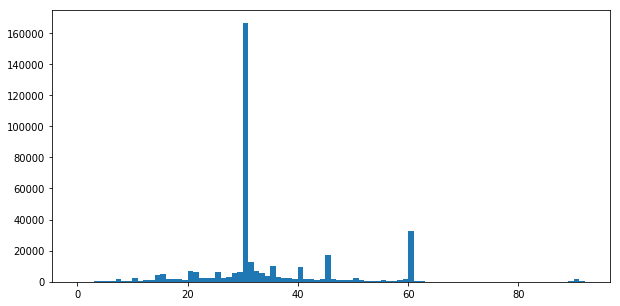

In [154]:
bins_edges = np.arange(0,df['time_launched'].max()+1,1)
plt.figure(figsize=(10,5))
plt.hist(data=df,x='time_launched',bins=bins_edges);


## most projects takes 30 days to launch